In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

# Reading reviews data

In [4]:
reviews = pd.read_csv("Final data/reviews.csv")

In [5]:
reviews.head(1)

,Unnamed: 0,review,id,sku,reviewer,name,aboutMe,rating,title,comment,submissionTime
0,0,NaN,24122,8149167,\r\r\n,NaN,NaN,5.0,AWESOME,The best yet! They came correct as usual! Pimp C Forever!,2007-08-10T07:42:00


In [6]:
reviews.drop(['Unnamed: 0','review','reviewer','name','aboutMe','submissionTime'],axis = 1,inplace=True)

In [7]:
pd.set_option('display.max_colwidth', -1)
reviews.head()

,id,sku,rating,title,comment
0,24122,8149167,5.0,AWESOME,The best yet! They came correct as usual! Pimp C Forever!
1,24145,8487032,5.0,Essential for any jazz fan,"Bottom line: Buy all of the Jazz Icons titles. Starting with the Brubeck, this series is the pinnacle of jazz on DVD. The biggest stars in their prime, all of them beautifully shot and with gorgeous sound. Anyone remotely interested in American music needs to have the whole series, starting with the Brubeck, though the boxed sets are the best value overall."
2,24165,8381538,4.0,Action? Check! Stunning visuals? Check!,Absolutely amazing special effects and cinematography...Don't be surprised by the ending as this has been chronicled in history :)
3,24308,6287804,4.0,Lives upto the expectations,"While it would be hard for any movie to top the original Matrix, this movie attempts to do so. On some levels, it is the best Matrix movie yet. It goes out with a bang. Without ruining the ending, I will say that it is a climactic experience, and keeps you pinned to your seat thirsty for more every step of the way. This movie, as well as the previous 2, belong in the collections of action fans everywhere."
4,24411,4307084,4.0,Great Game,"While this is an old game, and does not have amazing graphics it has great long lived playablity. This is a game that if you are not to familiar with gaming, and don't want to spend HOURS learning which special key does what you can pick up in about 30 minutes and be hacking and slashing with the best of them."


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221771 entries, 0 to 221770
Data columns (total 5 columns):
id         221771 non-null int64
sku        221771 non-null int64
rating     221771 non-null float64
title      221766 non-null object
comment    221769 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 8.5+ MB


In [9]:
len(reviews.sku.unique())

28661

# EDA

Text(0.5, 1.0, 'Distribution')

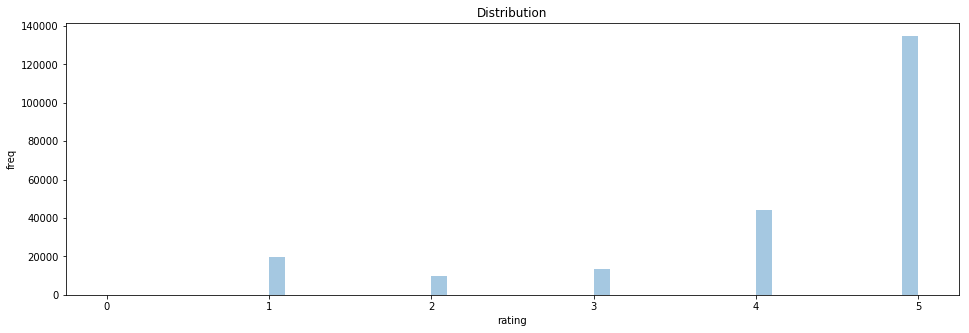

In [10]:
## Distribution Plots 
%matplotlib inline
plt.figure(figsize = (16,5))
sns.distplot(reviews.rating,kde = False)    
plt.ylabel('freq')
plt.title('Distribution')

In [11]:
# lets see why 5 is high
reviews[['sku','rating']].groupby(['sku','rating']).count()
x = reviews[['sku','rating']]
x['flag'] = 1

In [12]:
y = x.groupby(['sku','rating']).count()
y.head()

flag
sku    rating      
48530  4.0     1   
       5.0     1   
127687 5.0     5   
150115 1.0     1   
       5.0     1

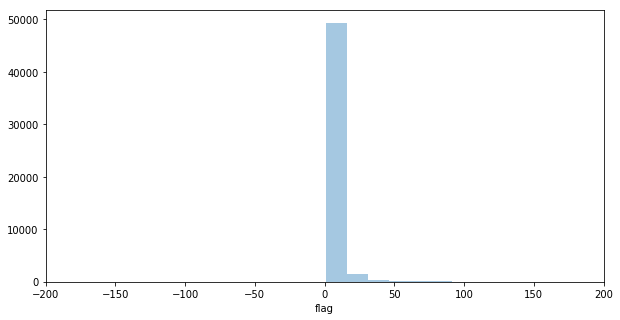

In [13]:
plt.figure(figsize = (10,5))
sns.distplot(y.flag,kde = False)  
plt.xlim(-200,200)
plt.show()

In [14]:
y.reset_index(inplace=True)

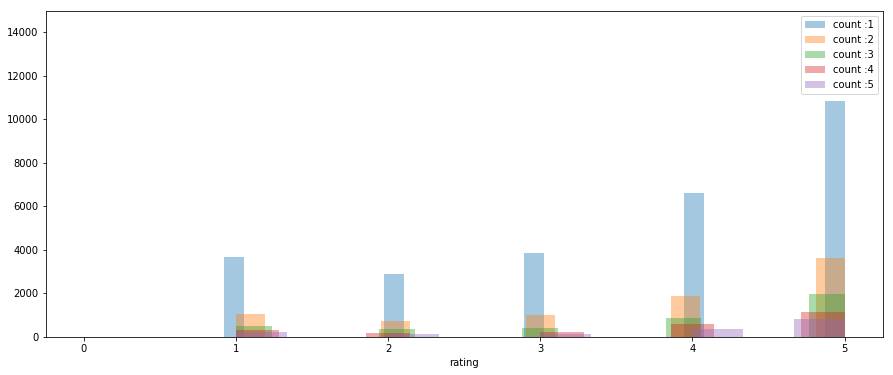

In [15]:
#Lets see how many are 5 among count 1
%matplotlib inline
plt.figure(figsize = (15,6))
for i in [1,2,3,4,5]:
    z = y[y.flag == i]
    sns.distplot(z.rating,kde = False,label=("count :" + str(i) ))
    plt.legend()
    plt.ylim(0,15000)


# We can clearly see that less numeber of ratings has 5 in the majority

## lets see how many rating each SKU has received

In [16]:
# lets see how many rating each user has given
x = pd.DataFrame(reviews.sku.value_counts())
x = x.reset_index()
x.columns = ['sku','count']

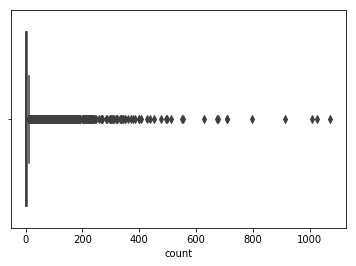

In [17]:
sns.boxplot('count',data = x,)

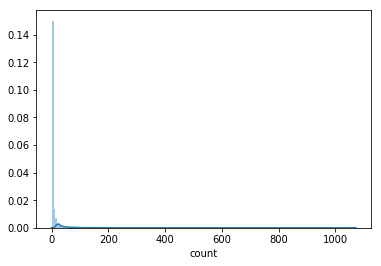

In [18]:
sns.distplot(x['count'],bins = 200)


In [19]:
import thinkstats2
import thinkplot

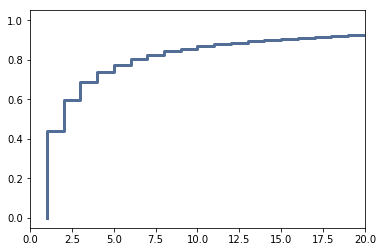

In [20]:
cdf = thinkstats2.Cdf(x['count'])
thinkplot.Cdf(cdf)
plt.xlim(0,20)
plt.show()

In [21]:
## lets filter some sku with very less reviews, form above chart we can see that more than 50 % data has less than 2 count lets take skus more than 5 counts
x = pd.DataFrame(reviews.sku.value_counts())
x = x.reset_index()
x.columns = ['sku','count']
y = x[x['count']>=5]


In [22]:
reviews.head()

,id,sku,rating,title,comment
0,24122,8149167,5.0,AWESOME,The best yet! They came correct as usual! Pimp C Forever!
1,24145,8487032,5.0,Essential for any jazz fan,"Bottom line: Buy all of the Jazz Icons titles. Starting with the Brubeck, this series is the pinnacle of jazz on DVD. The biggest stars in their prime, all of them beautifully shot and with gorgeous sound. Anyone remotely interested in American music needs to have the whole series, starting with the Brubeck, though the boxed sets are the best value overall."
2,24165,8381538,4.0,Action? Check! Stunning visuals? Check!,Absolutely amazing special effects and cinematography...Don't be surprised by the ending as this has been chronicled in history :)
3,24308,6287804,4.0,Lives upto the expectations,"While it would be hard for any movie to top the original Matrix, this movie attempts to do so. On some levels, it is the best Matrix movie yet. It goes out with a bang. Without ruining the ending, I will say that it is a climactic experience, and keeps you pinned to your seat thirsty for more every step of the way. This movie, as well as the previous 2, belong in the collections of action fans everywhere."
4,24411,4307084,4.0,Great Game,"While this is an old game, and does not have amazing graphics it has great long lived playablity. This is a game that if you are not to familiar with gaming, and don't want to spend HOURS learning which special key does what you can pick up in about 30 minutes and be hacking and slashing with the best of them."


In [23]:
df = y.merge(reviews,on = 'sku',how = 'inner')

In [24]:
df.drop('count',axis=1,inplace=True)

In [25]:
reviews.columns

Index(['id', 'sku', 'rating', 'title', 'comment'], dtype='object')

In [26]:
df.drop_duplicates(subset=['id', 'sku', 'rating', 'title', 'comment'],inplace=True)


In [27]:
df.shape

(186504, 5)

In [28]:
import string
import re
import nltk

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()


def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

df['cleaned_title'] = df.title.apply(lambda x: clean_text(str(x)))
df['cleaned_comment'] = df.comment.apply(lambda x: clean_text(str(x)))
df.head()

,sku,id,rating,title,comment,cleaned_title,cleaned_comment
0,1208844,3235310,1.0,Do not buy,"I accidentally bought this before realizing I swore never to buy netgear again. As with my prior netgear experience four years ago, installation was a nightmare. The setup software couldnt even get past the first stage. After getting dropped twice by telephone customer support, everything went unceremoniously into a garbage bag to be taken back to Best Buy. Cnet rates this as poor as well.",buy,accident bought realiz swore never buy netgear prior netgear experi four year ago instal nightmar setup softwar couldnt even get past first stage get drop twice telephon custom support everyth went unceremoni garbag bag taken back best buy cnet rate poor well
1,1208844,3243408,5.0,Swells speed.,Good speed this replaced my older modem be ause I wanted to down load net flicks. It does it perfectly. Inhaven't noticed a huge increase in range but speed advantage. I would recommend i,swell speed,good speed replac older modem aus want load net flick perfectli inhav notic huge increas rang speed advantag would recommend
2,1208844,3270324,4.0,GREAT ROUTER,"I've had this router for a month now. It works great !! Much better than the Belkin it replaced. No problems at all!! I use it to handle the lap top, the wireless desktop, and the PS3 (wired). No disconnects, no problems when I'm gaming, wife on desktop, and laptop logged on to enternet. All at the same time. I love it!!!!!!!!!!",great router,ive router month work great much better belkin replac problem use handl lap top wireless desktop ps3 wire disconnect problem im game wife desktop laptop log enternet time love
3,1208844,3279348,1.0,Poor customer support!,"Bought this router 7 months ago because I have up to 4 computers going in my home and was told this was one of NetGear's best premium routers and would have no problems. Had no problems for the first 6 months but magically as soon as my 6 month warranty lapsed the router slowed down to dial up speed whether I had 1 or 4 computers on line. Was told by the NetGear customer service that this happened regularly and I had to purchase 6 month($69.99) or 12 month($99.99) service contract so they could reconfigure my wireless software. Said their soft ware was continually ""going out of date"" and this service contract was necessary. Was told by one of my IT buddies that NetGear has these time activated software issues to force you to purchase their service contract. I can buy a new dual band router for less than their service contract. Don't buy this because NetGear has planned obsolence bult into their router's software. Buy Belkin or others with better CS. Won't stand behind their product. Disgruntled in Atlanta",poor custom support,bought router 7 month ago 4 comput go home told one netgear best premium router would problem problem first 6 month magic soon 6 month warranti laps router slow dial speed whether 1 4 comput line told netgear custom servic happen regularli purchas 6 month6999 12 month9999 servic contract could reconfigur wireless softwar said soft ware continu go date servic contract necessari told one buddi netgear time activ softwar issu forc purchas servic contract buy new dual band router less servic contract dont buy netgear plan obsol bult router softwar buy belkin other better cs wont stand behind product disgruntl atlanta
4,1208844,3354697,4.0,"Quality, Mid price router","The wndr 3400 is a mid-range router with some pretty nifty high end qualities. Essentially, this is the same wireless unit as the wndr3700, just without the gigabit Ethernet ports. If you prefer wireless over wired connections though, like me, This won't bother you one bit. Very easy to install and functions well if you know how to read and follow simple instructions. Overall, good router for its price!",qualiti mid price router,wndr 3400 midrang router pretti nifti high end qualiti essenti wireless unit wndr3700 without gigabit ethernet port prefer wireless wire

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10, 5))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


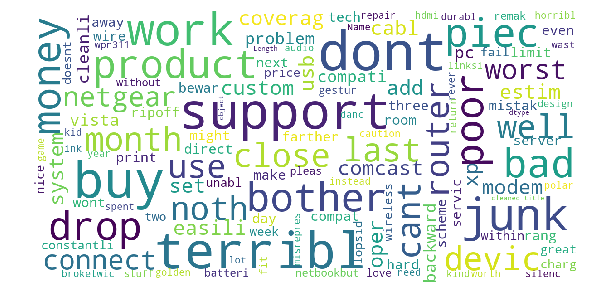

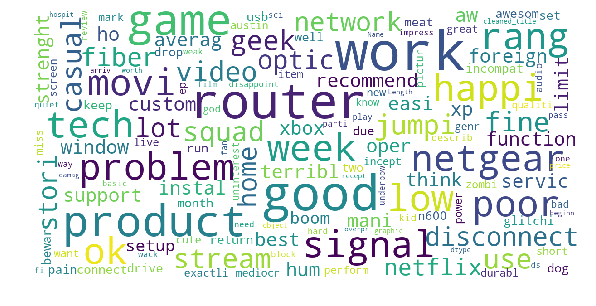

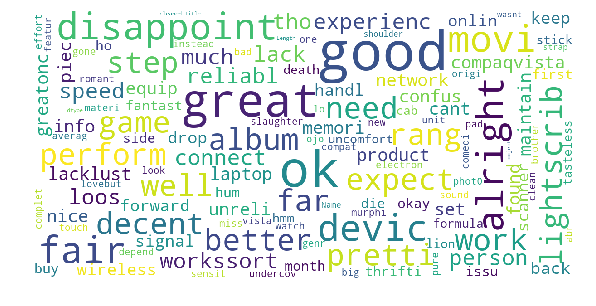

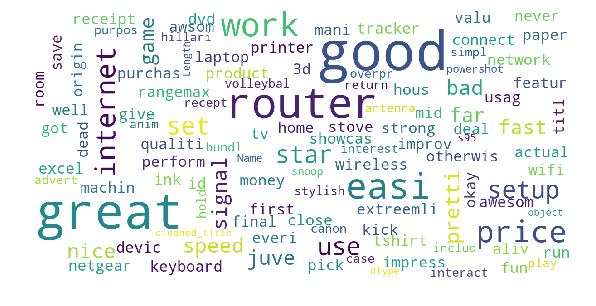

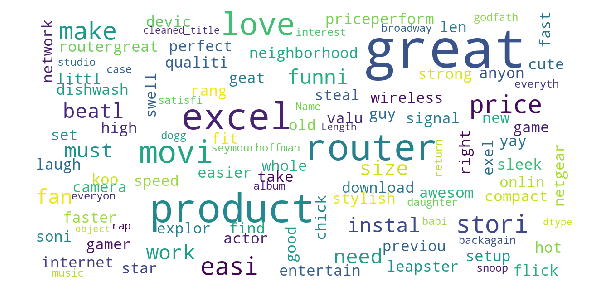

In [30]:
for i in [1,2,3,4,5]:
    show_wordcloud(df[df.rating==i].cleaned_title)
    



# Preparing data for Model

# Feature selection and engineering 

In [31]:
df['length_title'] = df['title'].apply(lambda x: len(str(x)))
df['length_comment'] = df['comment'].apply(lambda x: len(str(x)))

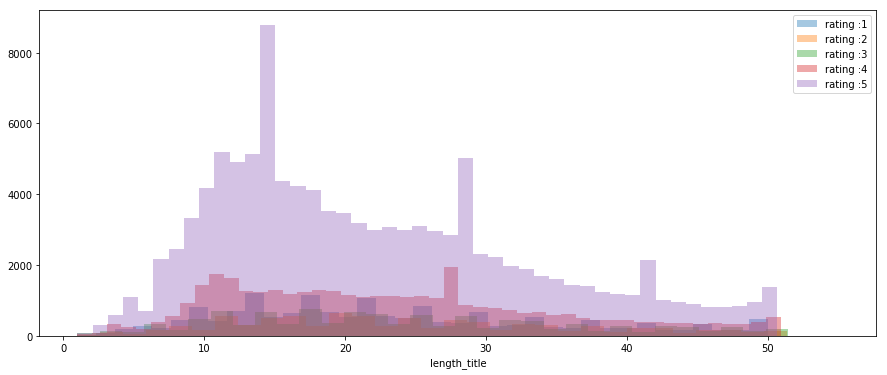

In [32]:
%matplotlib inline
plt.figure(figsize = (15,6))
for i in [1,2,3,4,5]:
    z = df[df.rating == i]
    sns.distplot(z.length_title,kde = False,label=("rating :" + str(i) ))
    plt.legend()
#     plt.ylim(0,15000)

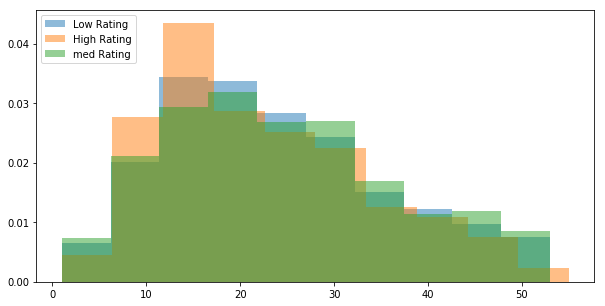

In [33]:
plt.figure(figsize = (10,5))
plt.hist(df[(df.rating <=2) ]['length_title'],alpha = 0.5,normed = True,label = 'Low Rating')
plt.hist(df[(df.rating >=4)]['length_title'],alpha = 0.5,normed = True,label = 'High Rating')
plt.hist(df[(df.rating ==3)]['length_title'],alpha = 0.5,normed = True,label = 'med Rating')
plt.legend(loc = 'upper left')
plt.show()

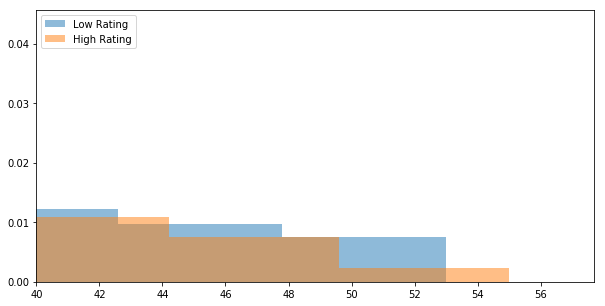

In [34]:
plt.figure(figsize = (10,5))
plt.hist(df[(df.rating <=2) ]['length_title'],alpha = 0.5,normed = True,label = 'Low Rating')
plt.hist(df[(df.rating >=4)]['length_title'],alpha = 0.5,normed = True,label = 'High Rating')
# plt.hist(df[(df.rating ==3)]['length_title'],alpha = 0.5,normed = True,label = 'med Rating')
plt.legend(loc = 'upper left')
plt.xlim(40,)
plt.show()

We can see as we are going right low rating bar is going up, means low rating customes write more than happy customers

## Lets see the same analysis in comment length

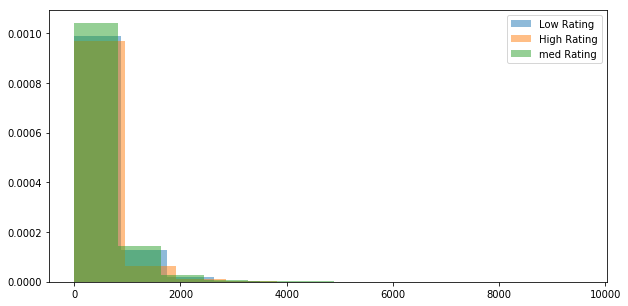

In [35]:
plt.figure(figsize = (10,5))
plt.hist(df[(df.rating <=2) ]['length_comment'],alpha = 0.5,normed = True,label = 'Low Rating')
plt.hist(df[(df.rating >=4)]['length_comment'],alpha = 0.5,normed = True,label = 'High Rating')
plt.hist(df[(df.rating ==3)]['length_comment'],alpha = 0.5,normed = True,label = 'med Rating')
plt.legend(loc = 'upper right')
plt.show()

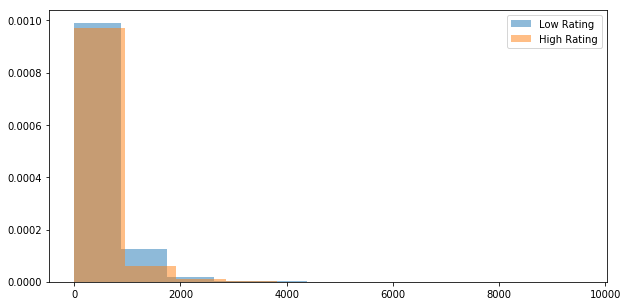

In [36]:
plt.figure(figsize = (10,5))
plt.hist(df[(df.rating <=2) ]['length_comment'],alpha = 0.5,normed = True,label = 'Low Rating')
plt.hist(df[(df.rating >=4)]['length_comment'],alpha = 0.5,normed = True,label = 'High Rating')
# plt.hist(df[(df.rating ==3)]['length_comment'],alpha = 0.5,normed = True,label = 'med Rating')
plt.legend(loc = 'upper right')
plt.show()

Same thing we can see from this chart too. 

### Create feature for % of text that is punctuation


In [37]:
import string

def cont_punc(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

In [38]:
df.columns

Index(['sku', 'id', 'rating', 'title', 'comment', 'cleaned_title',
       'cleaned_comment', 'length_title', 'length_comment'],
      dtype='object')

In [39]:
# High ratings have less punctuation than low ratings: hypothesis
df['punc%_title'] = df['title'].apply(lambda x:cont_punc(str(x)))
df['punc%_comment'] = df['comment'].apply(lambda x:cont_punc(str(x)))

In [40]:
df.head(2)

,sku,id,rating,title,comment,cleaned_title,cleaned_comment,length_title,length_comment,punc%_title,punc%_comment
0,1208844,3235310,1.0,Do not buy,"I accidentally bought this before realizing I swore never to buy netgear again. As with my prior netgear experience four years ago, installation was a nightmare. The setup software couldnt even get past the first stage. After getting dropped twice by telephone customer support, everything went unceremoniously into a garbage bag to be taken back to Best Buy. Cnet rates this as poor as well.",buy,accident bought realiz swore never buy netgear prior netgear experi four year ago instal nightmar setup softwar couldnt even get past first stage get drop twice telephon custom support everyth went unceremoni garbag bag taken back best buy cnet rate poor well,10,392,0.0,2.1
1,1208844,3243408,5.0,Swells speed.,Good speed this replaced my older modem be ause I wanted to down load net flicks. It does it perfectly. Inhaven't noticed a huge increase in range but speed advantage. I would recommend i,swell speed,good speed replac older modem aus want load net flick perfectli inhav notic huge increas rang speed advantag would recommend,13,187,8.3,2.6


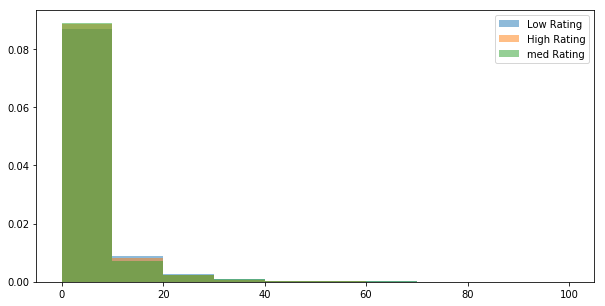

In [41]:
# lets see the plots
plt.figure(figsize = (10,5))
plt.hist(df[(df.rating <=2) ]['punc%_title'],alpha = 0.5,normed = True,label = 'Low Rating')
plt.hist(df[(df.rating >=4)]['punc%_title'],alpha = 0.5,normed = True,label = 'High Rating')
plt.hist(df[(df.rating ==3)]['punc%_title'],alpha = 0.5,normed = True,label = 'med Rating')
plt.legend(loc = 'upper right')
plt.show()

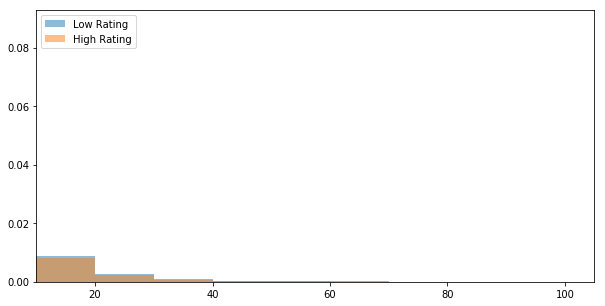

In [42]:
# lets see the plots
plt.figure(figsize = (10,5))
plt.hist(df[(df.rating <=2) ]['punc%_title'],alpha = 0.5,normed = True,label = 'Low Rating')
plt.hist(df[(df.rating >=4)]['punc%_title'],alpha = 0.5,normed = True,label = 'High Rating')
# plt.hist(df[(df.rating ==3)]['punc%_title'],alpha = 0.5,normed = True,label = 'med Rating')
plt.legend(loc = 'upper left')
plt.xlim(10,)
plt.show()

Slightly more fot low ratings in title let see for comment

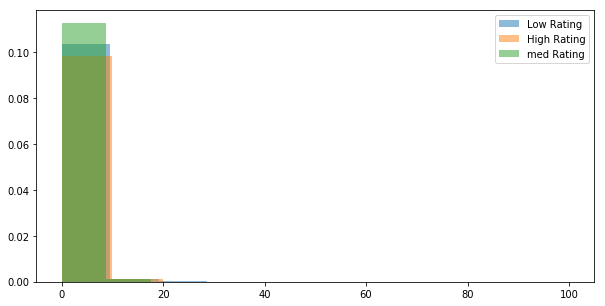

In [43]:
# lets see the plots
plt.figure(figsize = (10,5))
plt.hist(df[(df.rating <=2) ]['punc%_comment'],alpha = 0.5,normed = True,label = 'Low Rating')
plt.hist(df[(df.rating >=4)]['punc%_comment'],alpha = 0.5,normed = True,label = 'High Rating')
plt.hist(df[(df.rating ==3)]['punc%_comment'],alpha = 0.5,normed = True,label = 'med Rating')
plt.legend(loc = 'upper right')
plt.show()

In [44]:
df.columns

Index(['sku', 'id', 'rating', 'title', 'comment', 'cleaned_title',
       'cleaned_comment', 'length_title', 'length_comment', 'punc%_title',
       'punc%_comment'],
      dtype='object')

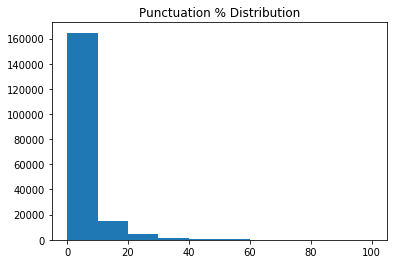

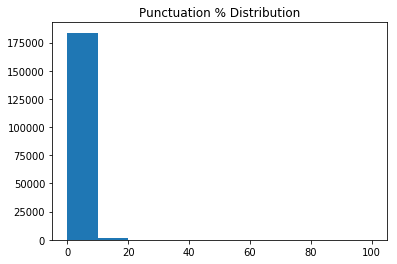

In [45]:
plt.hist(df['punc%_title'])
plt.title("Punctuation % Distribution")
plt.show()

plt.hist(df['punc%_comment'])
plt.title("Punctuation % Distribution")
plt.show()



### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |



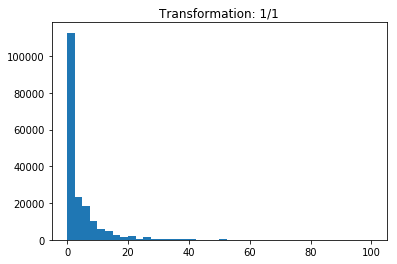

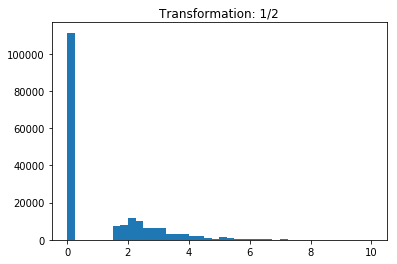

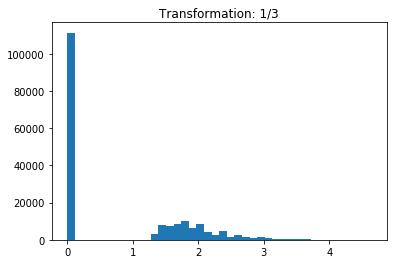

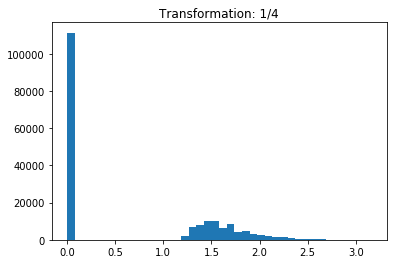

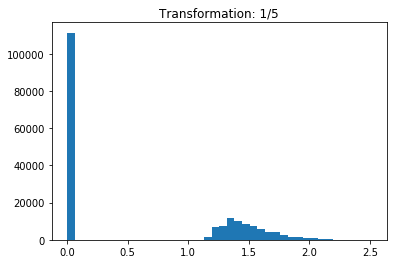

In [46]:
for i in [1,2,3,4,5]:
    plt.hist((df['punc%_title'])**(1/i),bins = 40)
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

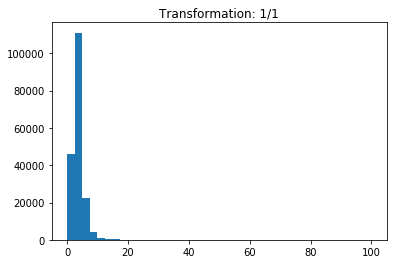

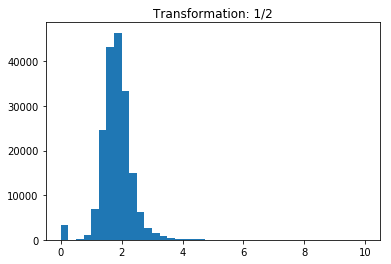

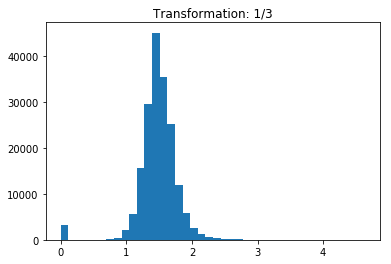

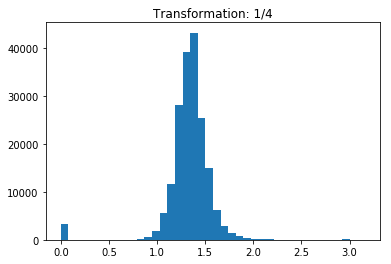

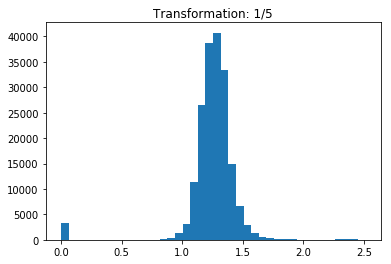

In [47]:
for i in [1,2,3,4,5]:
    plt.hist((df['punc%_comment'])**(1/i),bins = 40)
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

In [48]:
#Lets take transformation of 1/4 for both title and comment
df['punc%_title']=df['punc%_title']**(1/i)
df['punc%_comment']=df['punc%_comment']**(1/i)


## Lets transform the text Data

In [49]:
df.columns

Index(['sku', 'id', 'rating', 'title', 'comment', 'cleaned_title',
       'cleaned_comment', 'length_title', 'length_comment', 'punc%_title',
       'punc%_comment'],
      dtype='object')

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect_titile = CountVectorizer()
count_vect_comment = CountVectorizer()

X_counts_title = count_vect_titile.fit_transform(df.cleaned_title)
X_counts_comment = count_vect_comment.fit_transform(df.cleaned_comment)

In [51]:
X_counts__title_df = pd.DataFrame(X_counts_title.toarray())
X_counts__title_df.columns = count_vect_titile.get_feature_names()

X_counts__comment_df = pd.DataFrame(X_counts_comment.toarray())
X_counts__comment_df.columns = count_vect_comment.get_feature_names()

In [1]:
X_features = pd.concat([df[['rating','length_title', 'length_comment', 'punc%_title',
       'punc%_comment']],X_counts__title_df,X_counts__comment_df], axis=1)
X_features.head()

NameError: name 'pd' is not defined

Applying model on unigram count vectorizer
Next steps :n gram , tfidf 

In [ ]:
X_features.fillna(0,inplace=True)
X_features= X_features[X_features.rating!=3]
X_features= X_features[X_features.rating!=0]
X_features.shape

In [ ]:
X_features.rating.unique()

In [ ]:
X_features.rating = X_features.rating.replace(4,5)
X_features.rating = X_features.rating.replace(2,1)

In [ ]:
X_features.rating.unique()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = X_features.drop('rating',axis = 1)
y= X_features.rating

rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X, y, cv=k_fold, scoring='accuracy', n_jobs=-1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

k_fold = KFold(n_splits=5)
cross_val_score(nb, X, y, cv=k_fold, scoring='accuracy', n_jobs=-1)

Random forest is working better than MNB

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)

rf.fit(X_train, y_train)

In [ ]:
preds = rf.predict(X_test)

In [ ]:
print('Train score: %.4f'%rf.score(X_train,y_train))
print('Test score: %.4f'%rf.score(X_test,y_test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

In [ ]:
x = pd.DataFrame(zip(X.columns,rf.feature_importances_))
x.columns = ['Feature','importance']

In [ ]:
x.sort_values(by ='importance',ascending=False).head(8)

## Using N gram count vectorizer

In [ ]:
count_vect_titile = CountVectorizer(ngram_range=(2,2))
count_vect_comment = CountVectorizer(ngram_range=(2,2))

X_counts_title = count_vect_titile.fit_transform(df.cleaned_title)
X_counts_comment = count_vect_comment.fit_transform(df.cleaned_comment)

In [ ]:
X_counts__title_df = pd.DataFrame(X_counts_title.toarray())
X_counts__title_df.columns = count_vect_titile.get_feature_names()

X_counts__comment_df = pd.DataFrame(X_counts_comment.toarray())
X_counts__comment_df.columns = count_vect_comment.get_feature_names()

In [ ]:
X_features = pd.concat([df[['rating','length_title', 'length_comment', 'punc%_title',
       'punc%_comment']],X_counts__title_df,X_counts__comment_df], axis=1)
X_features.head()

In [ ]:
X = X_features.drop('rating',axis = 1)
y= X_features.rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

In [ ]:
print('Train score: %.4f'%lreg.score(X_train,y_train))
print('Test score: %.4f'%lreg.score(X_test,y_test))

In [ ]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

In [ ]:
x = pd.DataFrame(zip(X.columns,rf.feature_importances_))
x.columns = ['Feature','importance']

In [ ]:
x.sort_values(by ='importance',ascending=False).head(8)

In [ ]:
## Using TF iDF  vectorizer

In [ ]:
tfidf_vect_title = TfidfVectorizer(analyzer=clean_text)
X_tfidf_title = tfidf_vect.fit_transform(df.cleaned_title)

tfidf_vect_comment= TfidfVectorizer(analyzer=clean_text)
X_tfidf_comment = tfidf_vect.fit_transform(df.cleaned_comment)


X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

In [ ]:
X_tfidf_title_df = pd.DataFrame(X_tfidf_title.toarray())
X_tfidf_title_df.columns = tfidf_vect_title.get_feature_names()


X_tfidf_comment_df = pd.DataFrame(X_tfidf_comment.toarray())
X_tfidf_comment_df.columns = tfidf_vect_comment.get_feature_names()

In [ ]:
X_features = pd.concat([df[['rating','length_title', 'length_comment', 'punc%_title',
       'punc%_comment']],X_tfidf_title_df,X_tfidf_title_df], axis=1)
X_features.head()

In [ ]:
X = X_features.drop('rating',axis = 1)
y= X_features.rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

In [ ]:
print('Train score: %.4f'%lreg.score(X_train,y_train))
print('Test score: %.4f'%lreg.score(X_test,y_test))

In [ ]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

In [ ]:
x = pd.DataFrame(zip(X.columns,rf.feature_importances_))
x.columns = ['Feature','importance']

In [ ]:
x.sort_values(by ='importance',ascending=False).head(8)

In [ ]:
positive_review = Final['text'][59]
positive_review

negative_review = Final['text'][4571]
negative_review

negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

negative_review1 = review2['text'][17683]
negative_review1

negative_review_transformed = bow_transformer.transform([negative_review1])
nb.predict(negative_review_transformed)[0]

feature_to_coef = {
    word: coef for word, coef in zip(
        bow_transformer.get_feature_names(), nb.coef_[0]
    )
}

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)

for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[202:250]:
    print (best_negative)
    

### Single Word frequencies, bigrams and trigrams frequencies for rating 1 and 2

review2_rate_1_2.head()

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf_title = tfidf_vect.fit_transform(df.title)
# X_tfidf_comment = tfidf_vect.fit_transform(df.comment)

X_features = pd.concat([df[['length_title','length_comment','punc%_title','punc%_comment']], pd.DataFrame(X_tfidf_title.toarray())], axis=1)
X_features.head()

,length_title,length_comment,punc%_title,punc%_comment,0,1,2,3,4,5,...,17414,17415,17416,17417,17418,17419,17420,17421,17422,17423
0,10,392,0.0,2.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13,187,8.3,2.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,330,0.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22,1020,5.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25,406,4.5,3.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
list(df.columns)

['sku',
 'id',
 'rating',
 'title',
 'comment',
 'length_title',
 'length_comment',
 'punc%_title',
 'punc%_comment',
 'clean_title',
 'clean_comment',
 'title_token',
 'comment_token',
 'title_token_nostop',
 'comment_token_nostop',
 'title_token_nostop_stemmed',
 'comment_token_nostop_stemmed',
 'title_token_nostop_lemm',
 'comment_token_nostop_lemm']